In [75]:
!pip install seaborn
import numpy as np
import pandas as pd
import os 
import tqdm 
import glob
import matplotlib.pyplot as plt
import seaborn as sns


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [63]:
# Load the data back from the binary file
wnews_data = np.load('/Users/khushal/Desktop/Projects/python files /result_LSTM_df.npy',allow_pickle=True)

# Convert the NumPy array back to a DataFrame
wnews_df = pd.DataFrame(wnews_data, columns=['index','stock_name','MSE','Daily_Accuracy','Overall_Accuracy','True_Price' ,'Predicted_Price'])
wnews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             451 non-null    object
 1   stock_name        451 non-null    object
 2   MSE               451 non-null    object
 3   Daily_Accuracy    451 non-null    object
 4   Overall_Accuracy  451 non-null    object
 5   True_Price        451 non-null    object
 6   Predicted_Price   451 non-null    object
dtypes: object(7)
memory usage: 24.8+ KB


In [65]:
# Load the data back from the binary file
news_data = np.load('/Users/khushal/Desktop/Projects/python files /result_LSTM_news_df.npy',allow_pickle=True)

# Convert the NumPy array back to a DataFrame
news_df = pd.DataFrame(news_data, columns=['index','stock_name','MSE','Daily_Accuracy','Overall_Accuracy','True_Price' ,'Predicted_Price'])
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             451 non-null    object
 1   stock_name        451 non-null    object
 2   MSE               451 non-null    object
 3   Daily_Accuracy    451 non-null    object
 4   Overall_Accuracy  451 non-null    object
 5   True_Price        451 non-null    object
 6   Predicted_Price   451 non-null    object
dtypes: object(7)
memory usage: 24.8+ KB


In [69]:
import pandas as pd
import numpy as np

cut_data_dir = '/Users/khushal/Desktop/Projects/Data/cut_data'
cut_csv_path = glob.glob(cut_data_dir + '/*.csv')

df_news = news_df.copy()
df = wnews_df.copy()
#print(df_news.dtypes)
#print(df.dtypes)

m = len(cut_csv_path)
print(m)
cols = ['Daily_Accuracy']
news_accuracy = []
wnews_accuracy = []

for i in range(0, 9):
    t1 = 0
    t2 = 0
    for j in range(0, m):
        t1 += df_news['Daily_Accuracy'][j][i]
        t2 += df['Daily_Accuracy'][j][i]
 
    t1 = t1 / m
    t2 = t2 / m
 
    news_accuracy.append(t1)
    wnews_accuracy.append(t2)

print(len(news_accuracy))
print(wnews_accuracy)


451
9
[array([0.97377251]), array([0.97278424]), array([0.97483248]), array([0.97607953]), array([0.97687467]), array([0.97742011]), array([0.97801318]), array([0.97818342]), array([0.97863654])]


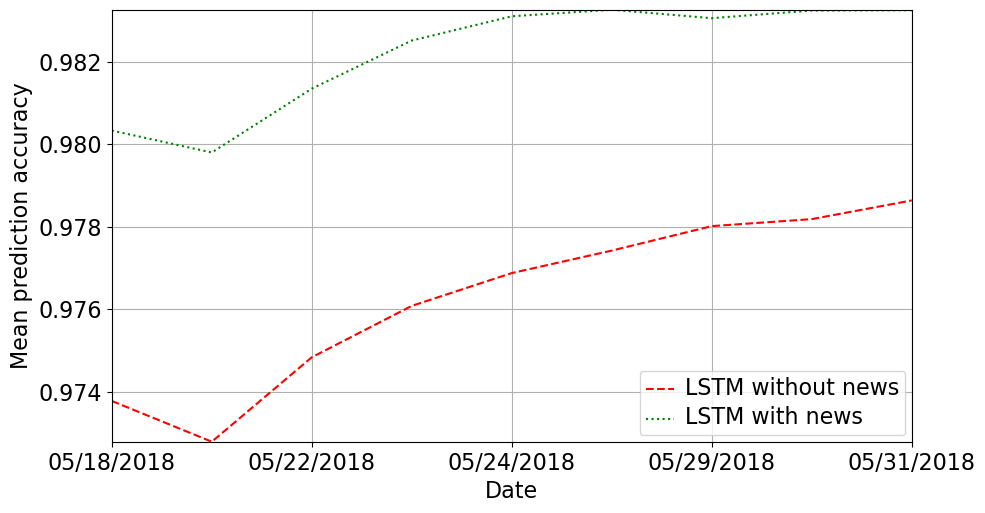

In [71]:
fig = plt.figure()
left, bottom, width, height = 0.1,0.1,1.25,0.9
ax1 = fig.add_axes([left,bottom,width,height])

plt.grid('on')

plt.plot(wnews_accuracy,color="red",label="LSTM without news",linestyle = "--",linewidth=1.5)
plt.plot(news_accuracy,color="green",label="LSTM with news",linestyle = ":",linewidth=1.5)


plt.yticks(fontsize=16)
plt.xlabel("Date",fontsize=16)
plt.ylabel("Mean prediction accuracy",fontsize=16)
plt.xlim(0,8)       
 
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=16) 
 
x=np.array([0.,  2.,  4.,  6., 8.])
group_labels=['05/18/2018','05/22/2018', '05/24/2018','05/29/2018', '05/31/2018']
plt.xticks(x,group_labels,fontsize=16,)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=16)

plt.savefig('/Users/khushal/Desktop/Projects/python files /accuracy_1.jpg',dpi = 200,bbox_inches='tight')
plt.margins(0,0)
plt.show()


<class 'list'>


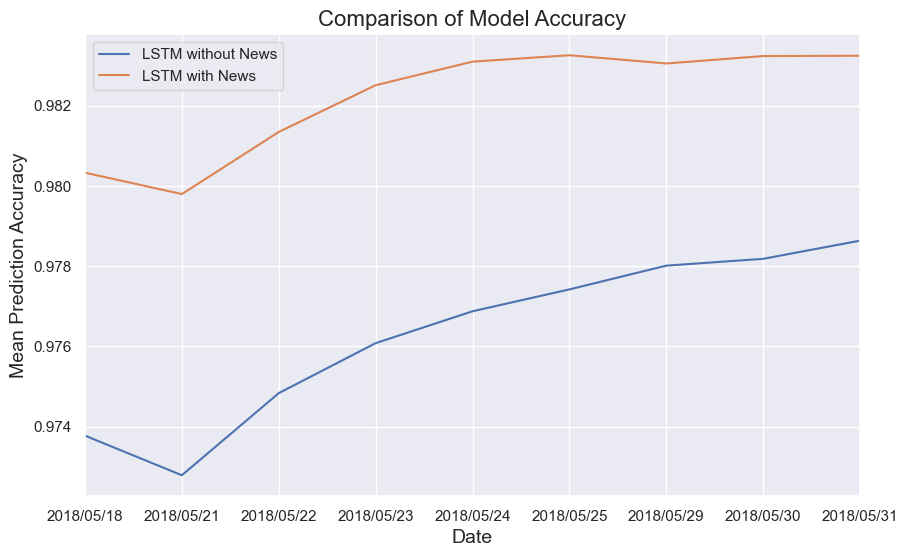

In [112]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
date_list = ['2018/05/18','2018/05/21','2018/05/22','2018/05/23','2018/05/24','2018/05/25','2018/05/29','2018/05/30','2018/05/31']
accuracy_model1 = wnews
accuracy_model2 = news
print(type(accuracy_model1))

# Create a DataFrame
df = pd.DataFrame({'Date': date_list, 'Model1 Accuracy': accuracy_model1, 'Model2 Accuracy': accuracy_model2})

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Plot the line for Model1 Accuracy
sns.lineplot(x='Date', y='Model1 Accuracy', data=df, label='LSTM without News')

# Plot the line for Model2 Accuracy
sns.lineplot(x='Date', y='Model2 Accuracy', data=df, label='LSTM with News')

# Set the x-axis limit to 9 data points
plt.xlim(0, 8)

# Set the labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Prediction Accuracy', fontsize=14)
plt.title('Comparison of Model Accuracy', fontsize=16)

# Show the legend
plt.legend(loc='best')
plt.savefig('/Users/khushal/Desktop/Projects/python files /accuracy_2.jpg',dpi = 200,bbox_inches='tight')
# Show the plot
plt.show()


9
9
120


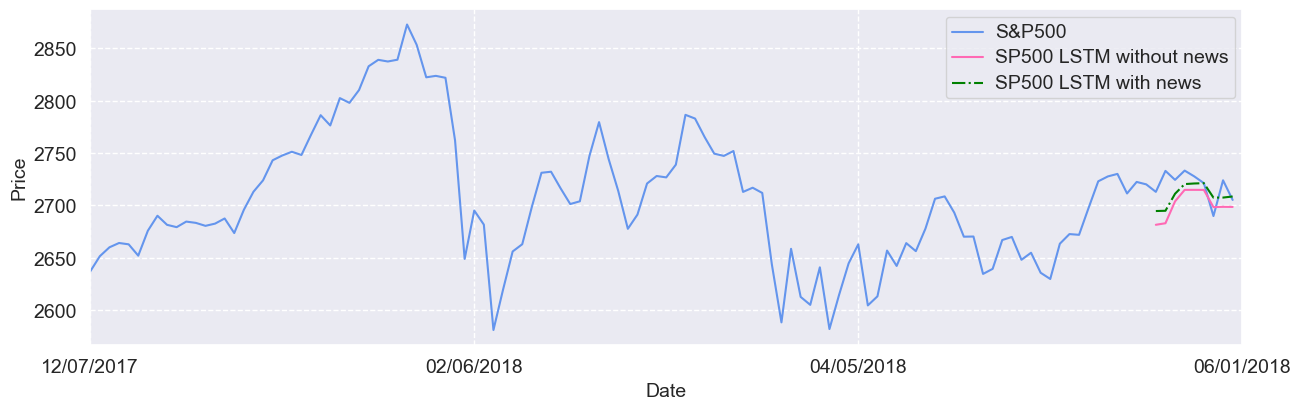

In [121]:
df_source_price = pd.read_csv("/Users/khushal/Desktop/Projects/source_price.csv")
sp_1dim_lstm = np.load('/Users/khushal/Desktop/Projects/python files /sp500_1dim_pred.npy')
print(len(sp_1dim_lstm))

sp_5dim_lstm = np.load('/Users/khushal/Desktop/Projects/python files /sp500_5dim_pred.npy')
print(len(sp_5dim_lstm))

sp_ori=df_source_price['Adj Close'][0:df_source_price.shape[0]-1]
print(len(sp_ori))

x_label = np.arange(111, 120)
x_label



fig = plt.figure()
left, bottom, width, height = 0.1,0.1,1.8,0.7
ax1 = fig.add_axes([left,bottom,width,height])
plt.grid(linestyle = "--")

plt.plot(sp_ori,color="cornflowerblue",linestyle = "-",label="S&P500",linewidth=1.5)
plt.plot(x_label,sp_1dim_lstm,color="hotpink",linestyle = "-",label="SP500 LSTM without news",linewidth=1.5)
plt.plot(x_label,sp_5dim_lstm,color="green",linestyle = "-.",label="SP500 LSTM with news",linewidth=1.5)
plt.yticks(fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.xlim(0,120)    
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=14) 

x=np.array([0.,  40.,  80., 120.])
group_labels=['12/07/2017','02/06/2018', '04/05/2018','06/01/2018']
plt.xticks(x,group_labels,fontsize=14,)
plt.savefig('/Users/khushal/Desktop/Projects/python files /snp500.jpg',dpi = 200,bbox_inches='tight')


In [116]:

sp_1dim_lstm=np.load('/Users/khushal/Desktop/Projects/sp_1dim_lstm.npy')
print(len(sp_1dim_lstm))

9


In [117]:
sp_5dim=np.load('/Users/khushal/Desktop/Projects/sp_5dim.npy')
print(len(sp_5dim))

9
